In [1]:
%matplotlib inline

import n2

import numpy
import matplotlib.cm
from astropy.units import deg

[18:25:17,089] INFO: python 3.6.5
[18:25:17,090] INFO: n2-tools 0.0.8


In [2]:
path = 'http://www.astro.s.osakafu-u.ac.jp/~nishimura/Orion/data/Orion.CO1221.Osaka.beam204.mom0.fits.gz'
d = n2.open_fits(path)

[18:25:17,102] INFO: (open_fits) path=http://www.astro.s.osakafu-u.ac.jp/~nishimura/Orion/data/Orion.CO1221.Osaka.beam204.mom0.fits.gz, hdu_num=0
[18:25:17,129] WARNING: (verify_header) Empty keyword: BMAJ
[18:25:17,130] WARNING: (verify_header) Empty keyword: BMIN


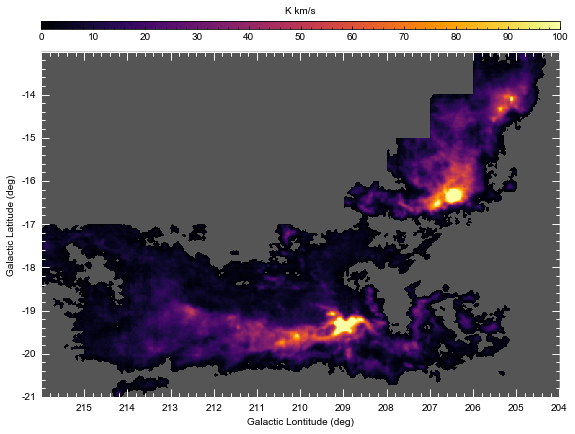

In [3]:
cm = matplotlib.cm.inferno
cm.set_bad('#555555', 1)


nx = d.header['NAXIS1']
ny = d.header['NAXIS2']

fig, ax = n2.plot.subplots(nx, ny, projection=d.wcs, top=100)
im = ax.imshow(d.data, vmin=0, vmax=100, cmap=cm)
cax = n2.plot.colorbar(ax, im, 'horizontal')
cax.set_ticks(numpy.arange(0, 101, 10))
cax.ax.minorticks_on()
cax.set_label('K km/s', labelpad=-35)
ax.coords[0].set_axislabel('Galactic Lontitude (deg)')
ax.coords[0].set_major_formatter('d')
ax.coords[0].set_ticks(spacing=1*deg, color='w', size=8)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].set_axislabel('Galactic Latitude (deg)')
ax.coords[1].set_major_formatter('d')
ax.coords[1].set_ticks(spacing=1*deg, color='w', size=8)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_color('w')
fig.savefig('colorbar-2.jpg', dpi=50)